In [17]:
# This note book will use the features created in feature engineering notebook and apply linear regression model on the same.
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
import os

In [18]:
feature_data = pd.read_csv("D:/Suyog's Docs/Data/FlightData/features.csv")#,header=None, names=flight_headers, dtype=flight_dtypes) #, header =[1])
feature_data = feature_data.drop(feature_data.columns[0],axis=1)
feature_data.head(5)

,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,TAXI_IN,ARRIVAL_DELAY,departure_time_earlymorning,departure_time_morning,departure_time_afternoon,arrival_time_earlymorning,arrival_time_morning,arrival_time_afternoon
0,-0.677271,-0.276785,-1.487592,-1.641208,-0.506501,-1.186866,0,0,0,0,0,0
1,-0.290225,0.284550,-0.886651,-1.590542,0.427826,0.081592,0,0,0,1,0,0
2,-0.599862,-1.118787,-0.261593,-1.674985,0.427826,-1.186866,1,0,0,1,0,0
3,-0.212816,-1.399454,0.317240,-1.742540,0.988423,0.477985,1,0,0,0,1,0
4,-0.057998,0.003882,1.095046,-1.658097,0.240961,-0.076966,0,1,0,0,1,0


In [19]:
# let us split data into target and independent variables
# there are four basic assumptoins of linear regression model , these are 
# 1. Linearity : the relation between X and Y should be linear
# 2. Homoscedasticity: The variance of residual is the same for any value of X
# 3. Independence: Observations are independent of each other.
# 4. Normality: For any fixed value of X, Y is normally distributed.
y_labelsels= feature_data.pop('ARRIVAL_DELAY').values
x_labels = feature_data.values


In [20]:
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(x_labels, y_labels, test_size=0.25, random_state=0)

In [21]:
#get number of records in train set
X_train.shape[0]

2982

In [22]:
#get number of records in test set
X_test.shape[0]

994

In [23]:
#let us run ordinalry least sqaure model on the data
from sklearn import linear_model
ols = linear_model.LinearRegression(normalize=True)

In [24]:
ols.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
coef = ols.coef_
intercept = ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [ 7.00676490e-01  3.60264355e-01  1.15997837e-02 -1.27184458e-01
  2.82009826e-01 -1.39872679e-01 -1.44921808e-01  5.77315973e-15
 -9.60393818e-02 -4.21903283e-02  0.00000000e+00]
intercept=  0.12546630573606862


In [26]:
ols.score(X_train,y_train)

0.5370033017106096

In [27]:
predicted_values = ols.predict(X_test)

In [28]:
predicted_delays = pd.DataFrame(predicted_values, columns=['Arrival_Delay'])
predicted_delays.head(5)
ols.score(X_test, predicted_values)
#Indicate how many variables compared to the total variables the model predicted.
#R-squared does not take into consideration any biases that might be present in the data. 
#Therefore, a good model might have a low R-squared value, or a model that does not fit the data might have a high R-squared value.
#R2 score does not represent the loss of data , but perforamnce of model
#With help of R squared we have a baseline model to compare a model which none of the other metrics provides. 
#The same we have in classification problems which we call a threshold which is fixed at 0.5. 
#So basically R2 squared calculates how must regression line is better than a mean line.
# R Sqaured is also called as Coefficient of Determination or Goodness of fit
from sklearn.metrics import r2_score
print(r2_score( y_test,predicted_delays))

0.5036401021325728


In [42]:
#The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases
#because It assumes that while adding more data variance of data increases.
#But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing
#which is incorrect.To control this situation Adjusted R Squared came into existence.
R2 = r2_score( y_test,predicted_delays)
n = y_test.size
p = X_test.size
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print ("adjusted R sqaured", Adj_r2 )

adjusted R sqaured 1.0495810661485117


In [32]:
#Mean Absoulute error sum all the errors and divide them by a total number of observations And this is MAE. 
#And we aim to get a minimum MAE because this is a loss.
# Its simplest form of error giving metric in same unit with robust to outliers
#The graph of MAE wont helpful to differentiate so optimzer like  gradient descent can be applied
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predicted_values)

0.5481590088531827

In [29]:
#Mean sqaure errorrepresents the squared distance between actual and predicted values.
#we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.
#If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. 
#So, in short, It is not Robust to outliers which were an advantage in MAE.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted_values)

0.48606260123929546

In [33]:
# root mean sqaured error: It is simeple root of mean sqaured error.
# It give output in same unit og input
#It is not robust to outlier as MAE
print("RMSE",np.sqrt(mean_squared_error(y_test,predicted_values)))

RMSE 0.697181899678481


In [35]:
#Root Mean Squared Log Error(RMSLE) 
#Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when
#you are developing a model without calling the inputs. In that case, the output will vary on a large scale.
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,predicted_values))))

RMSLE -0.3607089271212373


Text(0.5,1,'Predicted Vs Actuals By Model')

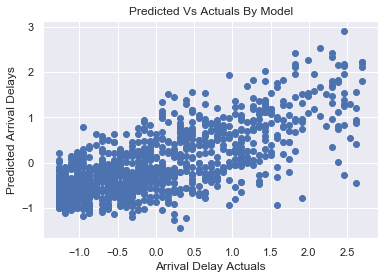

In [30]:
plt.scatter(y_test, predicted_delays)
plt.xlabel('Arrival Delay Actuals')
plt.ylabel('Predicted Arrival Delays')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Predicted Vs Actuals By Model")

In [31]:
#model has lot of variance , to reduce overfitting we need to regularize
lasso_model = linear_model.Lasso(normalize= True, alpha= 0.55)
lasso_model.fit(X_train,y_train)
print('coef= ' , lasso_model.coef_)
print('intercept= ' , lasso_model.intercept_)
print(lasso_model.score(X_train,y_train))
#price = model_l.predict()
#print('Predicted price of a 1650 sq-ft, 3 br house:', price)

coef=  [ 0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.]
intercept=  -0.012947241995551676
0.0


In [47]:
arrival_delay_predict = lasso_model.predict(X_test)

In [50]:
predicted_delays_lasso = pd.DataFrame(arrival_delay_predict, columns=['Arrival_Delay'])
predicted_delays_lasso.head(5)
ols.score(X_test, arrival_delay_predict)
# (coefficient of determination) regression score function.

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y
#disregarding the input features, would get a  score of 0.0.
from sklearn.metrics import r2_score
print(r2_score( y_test,predicted_delays_lasso))

-0.0027389177673455833


In [ ]:
def solution(A):
    # write your code in Python 3.6
    

Text(0.5,1,'Predicted Vs Actuals By Model')

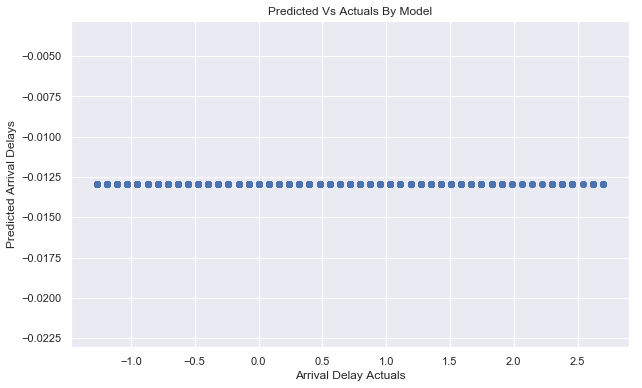

In [52]:
plt.scatter(y_test, predicted_delays_lasso)
plt.xlabel('Arrival Delay Actuals')
plt.ylabel('Predicted Arrival Delays')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Predicted Vs Actuals By Model")

In [54]:
#ridge regression
model_r = linear_model.Ridge(normalize= True, alpha= 35)
model_r.fit(X_train,y_train)
print('coef= ' , model_r.coef_)
print('intercept= ' , model_r.intercept_)

coef=  [ 0.01646913  0.00626403  0.00337469  0.00098914  0.00458922 -0.0017339
  0.00624969  0.         -0.003931    0.00431926  0.        ]
intercept=  -0.015215995679974116


In [55]:
arrival_delay_predict_r = model_r.predict(X_test)

In [57]:
predicted_delays_ridge = pd.DataFrame(arrival_delay_predict_r, columns=['Arrival_Delay'])
predicted_delays_ridge.head(5)
ols.score(X_test, arrival_delay_predict_r)
from sklearn.metrics import r2_score
print(r2_score( y_test,predicted_delays_ridge))

0.022190174034407484


Text(0.5,1,'Predicted Vs Actuals By Model')

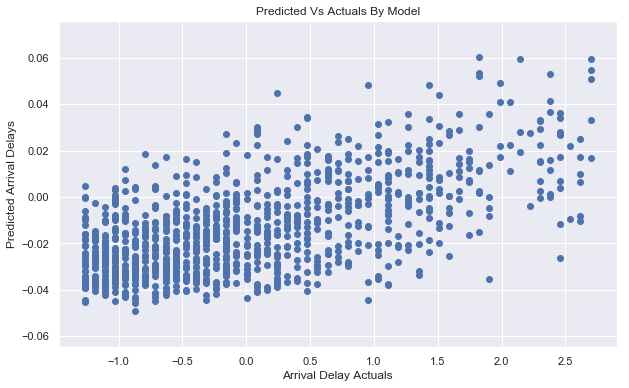

In [58]:
plt.scatter(y_test, predicted_delays_ridge)
plt.xlabel('Arrival Delay Actuals')
plt.ylabel('Predicted Arrival Delays')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Predicted Vs Actuals By Model")